In [4]:
import numpy as np 
import pandas as pd
from random import randint 
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [5]:
train_labels = []
train_samples = []

In [6]:
for i in range(50):
    # 5% younger who experienced side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # 5% older who didn't have side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # 95% younger who didn't have side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # 95% older who experienced side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    

In [7]:
print("train_samples", train_samples)
print("train_labels", train_labels)

train_samples [15, 92, 33, 90, 15, 69, 16, 95, 21, 73, 44, 83, 43, 76, 13, 80, 16, 96, 15, 74, 37, 98, 23, 69, 64, 92, 13, 79, 13, 87, 39, 74, 27, 88, 40, 97, 46, 90, 34, 68, 33, 70, 32, 69, 40, 87, 18, 67, 43, 99, 62, 98, 50, 94, 46, 86, 36, 90, 55, 80, 24, 94, 30, 65, 49, 90, 41, 85, 16, 98, 33, 84, 15, 83, 43, 75, 44, 97, 47, 80, 58, 82, 48, 73, 27, 70, 62, 83, 13, 93, 25, 73, 57, 67, 29, 93, 29, 77, 33, 95, 60, 86, 58, 68, 43, 98, 50, 69, 40, 97, 52, 72, 25, 69, 51, 67, 56, 66, 46, 91, 19, 97, 44, 99, 39, 83, 39, 67, 38, 72, 56, 86, 13, 68, 42, 94, 64, 67, 44, 93, 57, 79, 40, 72, 56, 85, 16, 83, 19, 84, 42, 90, 58, 69, 33, 97, 35, 86, 47, 70, 43, 99, 53, 99, 27, 77, 55, 72, 48, 70, 17, 94, 17, 65, 21, 68, 26, 84, 32, 73, 38, 94, 18, 93, 48, 95, 57, 91, 34, 87, 29, 78, 26, 73, 49, 91, 60, 75, 20, 93, 17, 74, 17, 75, 31, 77, 35, 95, 25, 88, 22, 71, 31, 93, 37, 86, 44, 70, 31, 90, 25, 97, 51, 74, 48, 68, 57, 68, 46, 65, 40, 79, 21, 85, 41, 94, 54, 80, 47, 68, 64, 91, 63, 72, 61, 87, 6

In [8]:
train_labels = np.array(train_labels) # Sequential model in Keras API works when passed to a fit fn.This expects numpy arrays
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1)) # Scaling between 0 and 1
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) #fir_transform doesn't accept 1D data so reshape it

In [10]:
print("scaled_train_samples", scaled_train_samples)

scaled_train_samples [[0.57471264]
 [1.        ]
 [0.32183908]
 ...
 [0.63218391]
 [0.85057471]
 [0.06896552]]


### Building Model

In [11]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU') # If using GPU,then run this cell
print('Num GPUs Available: ',len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [12]:
model = Sequential([
    Dense(units = 16, input_shape = (1,), activation = 'relu'), # This is the first hidden layer.Input layer is not defined and given as a shape
    Dense(units = 32, activation = 'relu'), # units are neurons
    Dense(units = 2, activation = 'softmax') # Output layer,2 outputs(experienced side effects or not)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # Compiles and prepares the model for training

In [15]:
model.fit(x = scaled_train_samples, y = train_labels, batch_size = 10, epochs = 30, shuffle = True, verbose = 2) # Training the model,Verbose is to see outputs,2 is most elaborate way to specify output.

Epoch 1/30
210/210 - 1s - loss: 0.6655 - accuracy: 0.5429
Epoch 2/30
210/210 - 0s - loss: 0.6344 - accuracy: 0.6524
Epoch 3/30
210/210 - 0s - loss: 0.6005 - accuracy: 0.7281
Epoch 4/30
210/210 - 0s - loss: 0.5654 - accuracy: 0.7871
Epoch 5/30
210/210 - 0s - loss: 0.5294 - accuracy: 0.8210
Epoch 6/30
210/210 - 0s - loss: 0.4933 - accuracy: 0.8410
Epoch 7/30
210/210 - 0s - loss: 0.4588 - accuracy: 0.8595
Epoch 8/30
210/210 - 0s - loss: 0.4278 - accuracy: 0.8795
Epoch 9/30
210/210 - 0s - loss: 0.4003 - accuracy: 0.8881
Epoch 10/30
210/210 - 0s - loss: 0.3770 - accuracy: 0.9005
Epoch 11/30
210/210 - 0s - loss: 0.3576 - accuracy: 0.9033
Epoch 12/30
210/210 - 0s - loss: 0.3420 - accuracy: 0.9138
Epoch 13/30
210/210 - 0s - loss: 0.3294 - accuracy: 0.9138
Epoch 14/30
210/210 - 0s - loss: 0.3190 - accuracy: 0.9186
Epoch 15/30
210/210 - 0s - loss: 0.3108 - accuracy: 0.9210
Epoch 16/30
210/210 - 0s - loss: 0.3038 - accuracy: 0.9200
Epoch 17/30
210/210 - 0s - loss: 0.2985 - accuracy: 0.9286
Epoch 

In [16]:
model.fit(x = scaled_train_samples, y = train_labels, validation_split = 0.1, batch_size = 10, epochs = 30, shuffle = True, verbose = 2) # Validation split as 0.1 takes last 10% of training data which is used to check for overfitting problem.Note that shuffle in fit fn. is done after validation split so to avoid a biased validation dataset, shuffle before passing through fit fn.

Epoch 1/30
189/189 - 0s - loss: 0.2646 - accuracy: 0.9354 - val_loss: 0.2916 - val_accuracy: 0.9381
Epoch 2/30
189/189 - 0s - loss: 0.2637 - accuracy: 0.9349 - val_loss: 0.2912 - val_accuracy: 0.9381
Epoch 3/30
189/189 - 0s - loss: 0.2629 - accuracy: 0.9354 - val_loss: 0.2904 - val_accuracy: 0.9381
Epoch 4/30
189/189 - 0s - loss: 0.2621 - accuracy: 0.9354 - val_loss: 0.2898 - val_accuracy: 0.9381
Epoch 5/30
189/189 - 0s - loss: 0.2614 - accuracy: 0.9376 - val_loss: 0.2891 - val_accuracy: 0.9381
Epoch 6/30
189/189 - 0s - loss: 0.2607 - accuracy: 0.9354 - val_loss: 0.2886 - val_accuracy: 0.9381
Epoch 7/30
189/189 - 0s - loss: 0.2600 - accuracy: 0.9381 - val_loss: 0.2878 - val_accuracy: 0.9381
Epoch 8/30
189/189 - 0s - loss: 0.2594 - accuracy: 0.9354 - val_loss: 0.2873 - val_accuracy: 0.9381
Epoch 9/30
189/189 - 0s - loss: 0.2588 - accuracy: 0.9360 - val_loss: 0.2872 - val_accuracy: 0.9524
Epoch 10/30
189/189 - 0s - loss: 0.2585 - accuracy: 0.9407 - val_loss: 0.2859 - val_accuracy: 0.9381

### Testing set

In [17]:
test_labels = []
test_samples = []

In [18]:
for i in range(50):
    # 5% younger who experienced side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # 5% older who didn't have side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # 95% younger who didn't have side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # 95% older who experienced side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    

In [19]:
print("test_samples", test_samples)
print("test_labels", test_labels)

test_samples [46, 65, 46, 83, 44, 67, 37, 90, 26, 84, 42, 74, 63, 82, 36, 67, 18, 90, 22, 67, 57, 84, 61, 92, 36, 83, 16, 92, 48, 73, 44, 90, 48, 86, 52, 98, 32, 65, 64, 76, 61, 88, 20, 91, 40, 93, 22, 88, 58, 66, 55, 80, 56, 97, 26, 91, 17, 96, 59, 83, 46, 81, 23, 78, 26, 80, 48, 75, 31, 73, 57, 80, 38, 78, 40, 81, 26, 73, 24, 95, 51, 74, 15, 79, 60, 65, 52, 75, 60, 78, 56, 99, 61, 83, 19, 86, 16, 69, 27, 87, 33, 92, 58, 88, 27, 89, 14, 92, 55, 67, 28, 96, 54, 74, 45, 92, 19, 89, 42, 75, 49, 93, 15, 80, 56, 69, 16, 87, 55, 79, 20, 72, 45, 75, 49, 66, 17, 86, 24, 93, 42, 65, 30, 66, 55, 91, 40, 67, 40, 100, 58, 70, 35, 71, 31, 97, 16, 82, 15, 95, 29, 83, 63, 68, 32, 92, 56, 93, 13, 80, 22, 84, 34, 98, 15, 97, 22, 99, 21, 96, 56, 95, 41, 75, 19, 80, 45, 65, 49, 87, 18, 87, 29, 69, 23, 88, 55, 100, 14, 80, 14, 90, 61, 71, 47, 87, 49, 91, 63, 68, 19, 73, 55, 98, 64, 67, 60, 70, 47, 70, 42, 87, 33, 85, 38, 100, 42, 81, 31, 100, 28, 99, 25, 68, 54, 93, 16, 78, 61, 80, 51, 68, 62, 98, 29, 71

In [20]:
test_labels = np.array(test_labels) # Sequential model in Keras API works when passed to a fit fn.This expects numpy arrays
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [21]:
scaler = MinMaxScaler(feature_range=(0,1)) # Scaling between 0 and 1
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1)) #fir_transform doesn't accept 1D data so reshape it

In [22]:
print("scaled_test_samples", scaled_test_samples)

scaled_test_samples [[0.91954023]
 [0.88505747]
 [0.09195402]
 ...
 [0.89655172]
 [0.70114943]
 [0.74712644]]


### Predict

In [26]:
predictions = model.predict(x = scaled_test_samples, batch_size = 10, verbose = 0)

In [28]:
predictions

array([[0.02805412, 0.9719458 ],
       [0.03625894, 0.963741  ],
       [0.9733363 , 0.02666369],
       ...,
       [0.03329522, 0.9667048 ],
       [0.13392912, 0.86607087],
       [0.09796647, 0.90203357]], dtype=float32)

In [29]:
for i in predictions:
    print(i) # Each datapoint has two values first for not experiencing side effects(index 0) and experiencing side effects(index 1)

]
[0.07087033 0.92912966]
[0.13392912 0.86607087]
[0.0153139  0.98468614]
[0.9457659  0.05423405]
[0.04296511 0.9570349 ]
[0.14451146 0.8554885 ]
[0.32029164 0.67970836]
[0.83795583 0.16204424]
[0.11472695 0.885273  ]
[0.9724292  0.02757077]
[0.08342382 0.9165762 ]
[0.882756   0.11724399]
[0.9736589 0.0263411]
[0.6095288 0.3904712]
[0.27847078 0.72152925]
[0.97204787 0.02795214]
[0.06008205 0.939918  ]
[0.01670469 0.98329526]
[0.9726795  0.02732045]
[0.36521387 0.6347862 ]
[0.11472695 0.885273  ]
[0.20565554 0.7943445 ]
[0.97317356 0.02682643]
[0.09796647 0.90203357]
[0.17496291 0.82503706]
[0.97204787 0.02795214]
[0.32029164 0.67970836]
[0.96685725 0.03314279]
[0.24018097 0.75981903]
[0.9725964  0.02740364]
[0.09043222 0.9095678 ]
[0.06526917 0.9347308 ]
[0.9734981  0.02650192]
[0.83795583 0.16204424]
[0.17496291 0.82503706]
[0.17496291 0.82503706]
[0.06008205 0.939918  ]
[0.83795583 0.16204424]
[0.9499511 0.0500489]
[0.02574314 0.9742569 ]
[0.36521387 0.6347862 ]
[0.17496291 0.825037

In [30]:
rounded_predictions = np.argmax(predictions, axis = -1)
for i in rounded_predictions:
    print(i)

1
1
0
1
0
1
1
0
1
0
1
0
0
0
1
0
0
0
0
0
1
1
1
0
0
1
1
1
0
0
0
1
0
0
0
0
0
1
1
1
1
0
1
1
0
0
1
0
1
0
1
0
1
1
0
1
0
0
0
1
1
0
0
1
1
1
0
1
0
0
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
0
1
0
0
1
0
1
1
1
0
0
1
1
1
0
1
1
0
1
0
1
1
0
0
1
1
0
1
1
0
1
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
0
1
0
0
1
1
0
1
0
1
0
1
1
1
0
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
1
0
0
1
0
0
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
0
0
0
0
1
0
1
0
1
0
1
1
1
1
1
1
0
1
0
1
1
1
0
1
0
1
1
0
0
1
1
1
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
1
0
0
1
0
1
1
1
1
1
1
1
0
1
0
0
0
0
1
1
0
0
1
1
0
1
1
0
1
0
0
0
0
1
1
1
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
1
1
1
1
0
0
0
1
0
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
0
1
1
0
1
1
1
1
0
0
1
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
1
0
0
0
1
1
0
1
1
0
1
0
1
0
0
0
1
1
0
0
1
0
1
1
1
0
0
0
1
0
0
1
1
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
1
0
0
0
1
1
0
0
0
0
0
1
0
1
1
0
1
1
1
1
0
1
0
0
0
1
1
1
1
1
0
0
0
0
1
1
0
1
0
1
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
1
0


### Visualise Results via Confusion Matrix

In [34]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

In [32]:
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)

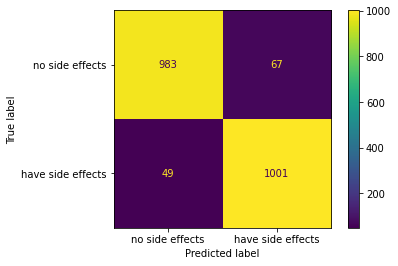

In [37]:
cm_plot_label = ['no side effects', 'have side effects']
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = cm_plot_label)
disp.plot()

### Save and load a Model

### 1.model.save()

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [41]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')
    # To save only weights replace model.save with model.save_weights,so for loading weights create new model2 with same architecture and model2.load_weights()


In [42]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [43]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [44]:
new_model.get_weights()

[array([[-0.11402443,  0.5750663 , -0.41071403,  0.61403626, -0.52264416,
         -0.54314226,  0.77304184, -0.13131535,  0.51153994,  0.48221356,
         -0.10379055, -0.2268489 , -0.15205565, -0.08122051,  0.2951365 ,
         -0.40705758]], dtype=float32),
 array([ 0.        , -0.18743064,  0.        , -0.19311726,  0.        ,
         0.        , -0.1737027 ,  0.        ,  0.08021542, -0.13887633,
         0.        ,  0.        ,  0.20273261,  0.        , -0.13776435,
         0.        ], dtype=float32),
 array([[-2.94787109e-01,  1.91222727e-02, -1.27223045e-01,
         -1.38299659e-01,  2.00681061e-01, -3.07979584e-02,
         -2.32544646e-01, -2.51796812e-01,  1.22766018e-01,
         -1.57147720e-01, -1.63125828e-01, -3.33562046e-01,
          5.94337881e-02,  3.35071713e-01, -2.98513561e-01,
          1.34898484e-01, -1.39512733e-01, -2.58848310e-01,
         -1.71138704e-01, -6.07310832e-02,  3.38419080e-02,
          1.88466311e-02, -2.31704324e-01, -1.00672305e-01,
 

In [45]:
new_model.optimizer

### 2. model.to_json()  
This method is used if we want to save only architecture of model and not any weights or parameters of it

In [46]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [47]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)


In [48]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.to_yaml()

In [49]:
yaml_string = model.to_yaml()
yaml_string

'backend: tensorflow\nclass_name: Sequential\nconfig:\n  layers:\n  - class_name: InputLayer\n    config:\n      batch_input_shape: !!python/tuple\n      - null\n      - 1\n      dtype: float32\n      name: dense_input\n      ragged: false\n      sparse: false\n  - class_name: Dense\n    config:\n      activation: relu\n      activity_regularizer: null\n      batch_input_shape: !!python/tuple\n      - null\n      - 1\n      bias_constraint: null\n      bias_initializer:\n        class_name: Zeros\n        config: {}\n      bias_regularizer: null\n      dtype: float32\n      kernel_constraint: null\n      kernel_initializer:\n        class_name: GlorotUniform\n        config:\n          seed: null\n      kernel_regularizer: null\n      name: dense\n      trainable: true\n      units: 16\n      use_bias: true\n  - class_name: Dense\n    config:\n      activation: relu\n      activity_regularizer: null\n      bias_constraint: null\n      bias_initializer:\n        class_name: Zeros\n     

In [50]:
from tensorflow.keras.models import model_from_yaml
model_yaml = model_from_yaml(yaml_string)
model_yaml.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Convolutional Neural Network

In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random 
import glob 
import matplotlib.pyplot as plt 
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

### Data Preparation    
For data check for kaggle competition dogs vs cats train.zip file

In [3]:
# Organise data into train,valid and test dirs
os.chdir('E:\windows_coding\Keras\dogs-vs-cats') # os.chdir() method in Python used to change the current working directory to specified path
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('test/dog')
    os.makedirs('valid/dog')
    os.makedirs('train/cat')
    os.makedirs('test/cat')
    os.makedirs('valid/cat')

    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')
os.chdir('../../')

In [2]:
train_path = 'E:/windows_coding/Keras/dogs-vs-cats/train' # Make sure address is built using forward slashes
test_path = 'E:/windows_coding/Keras/dogs-vs-cats/test'
valid_path = 'E:/windows_coding/Keras/dogs-vs-cats/valid'

In [3]:
# We are formatting images to vgg16 format and resizing images into sizes of 224.The only difference for all the three is we change paths for train,test and validation sets and make shuffle is false since we need to create confusion matrix  
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = valid_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10, shuffle = False)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [9]:
imgs, labels = next(train_batches)

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

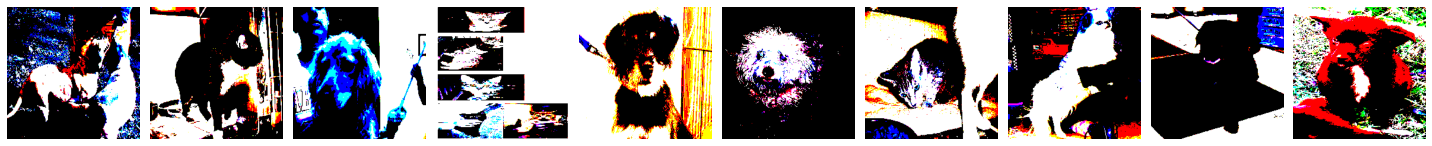

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
plotImages(imgs)
print(labels)

### Build and train a CNN

In [12]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)), # 0 padding
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Since we have only two outputs we can use binary_crossentropy with only one Dense unit and a sigmoid activation.They both yield similar results but the above is common practice for more than two classes

In [15]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)# Since we used ImageDataGenerator,labels are bound to the inputs x so there is no need to seperately give y values

Epoch 1/10
100/100 - 50s - loss: 21.4711 - accuracy: 0.5350 - val_loss: 14.2197 - val_accuracy: 0.5050
Epoch 2/10
100/100 - 48s - loss: 3.3311 - accuracy: 0.7160 - val_loss: 3.1817 - val_accuracy: 0.6150
Epoch 3/10
100/100 - 45s - loss: 0.6935 - accuracy: 0.8860 - val_loss: 5.0294 - val_accuracy: 0.5700
Epoch 4/10
100/100 - 45s - loss: 0.3428 - accuracy: 0.9400 - val_loss: 2.6595 - val_accuracy: 0.6150
Epoch 5/10
100/100 - 45s - loss: 0.0889 - accuracy: 0.9740 - val_loss: 2.7214 - val_accuracy: 0.6000
Epoch 6/10
100/100 - 47s - loss: 0.0301 - accuracy: 0.9890 - val_loss: 2.4134 - val_accuracy: 0.6300
Epoch 7/10
100/100 - 48s - loss: 0.0025 - accuracy: 0.9990 - val_loss: 2.5104 - val_accuracy: 0.6350
Epoch 8/10
100/100 - 45s - loss: 9.2591e-04 - accuracy: 1.0000 - val_loss: 2.4301 - val_accuracy: 0.6250
Epoch 9/10
100/100 - 36s - loss: 4.8947e-04 - accuracy: 1.0000 - val_loss: 2.4325 - val_accuracy: 0.6250
Epoch 10/10
100/100 - 37s - loss: 3.8872e-04 - accuracy: 1.0000 - val_loss: 2.412

There is clearly overfitting in this model as my validation accuracy is only 63% while my training accuracy reached 100%

### Prediction based on Test Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

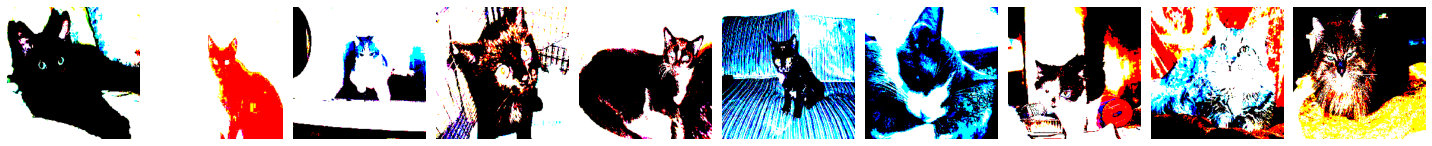

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [16]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [17]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [19]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [20]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[35 15]
 [16 34]]


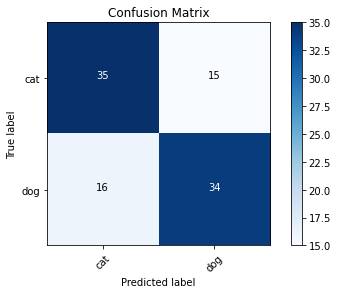

In [24]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Build Fine-tuned VGG16 model

In [5]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [6]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [8]:
model = Sequential() # Creating a dummy variable model and copied each of the vgg16 model layers except the last one
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [10]:
for layer in model.layers:
    layer.trainable = False # VGG16 was trained on 1000 classes which include this cat and dog classes.Our sole intention is to make the output layer predict two classes,thus while training these layers are not to be disturbed.So trainable is set to false.

In [11]:
model.add(Dense(units = 2, activation = 'softmax')) # Adding the final layer

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

Initially before setting Trainable to false there were 134,260,544 trainable parameters but now we only have the last layer's 8194 trainable parameters

### Train the new VGG16 adapted model

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 274s - loss: 0.2728 - accuracy: 0.8870 - val_loss: 0.1621 - val_accuracy: 0.9300
Epoch 2/5
100/100 - 251s - loss: 0.0860 - accuracy: 0.9710 - val_loss: 0.1285 - val_accuracy: 0.9450
Epoch 3/5
100/100 - 241s - loss: 0.0565 - accuracy: 0.9840 - val_loss: 0.1178 - val_accuracy: 0.9500
Epoch 4/5
100/100 - 256s - loss: 0.0403 - accuracy: 0.9910 - val_loss: 0.1126 - val_accuracy: 0.9500
Epoch 5/5
100/100 - 263s - loss: 0.0299 - accuracy: 0.9940 - val_loss: 0.1084 - val_accuracy: 0.9500


### Predict using finetuned VGG16 model

In [15]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [16]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[48  2]
 [ 2 48]]


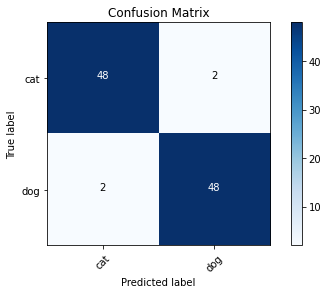

In [20]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Mobilenet

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 6s 0us/step


In [26]:
def prepare_image(file):
    img_path = 'MobileNet-samples/' 
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

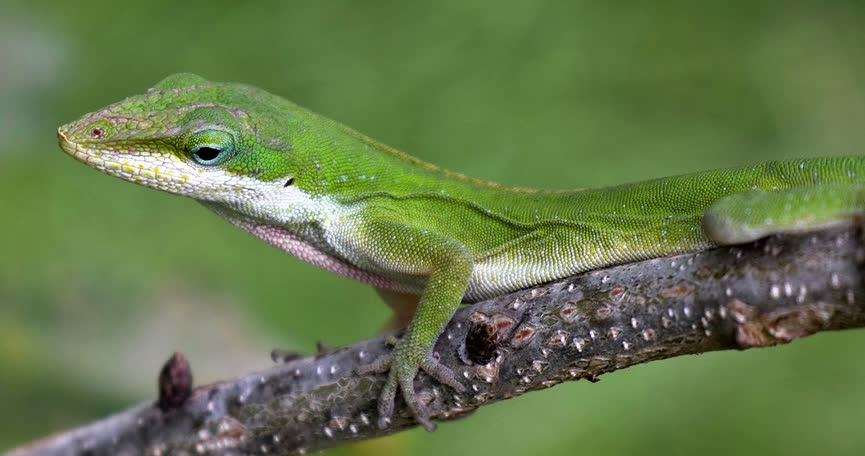

In [35]:
from IPython.display import Image
Image(filename='MobileNet-samples/1.JPG', width=300,height=200)

In [36]:
preprocessed_image = prepare_image('1.JPG')
predictions = mobile.predict(preprocessed_image)

In [37]:
results = imagenet_utils.decode_predictions(predictions)

In [38]:
results

[[('n01682714', 'American_chameleon', 0.6527746),
  ('n01693334', 'green_lizard', 0.18930016),
  ('n01687978', 'agama', 0.1380956),
  ('n01689811', 'alligator_lizard', 0.013602641),
  ('n01688243', 'frilled_lizard', 0.004319323)]]

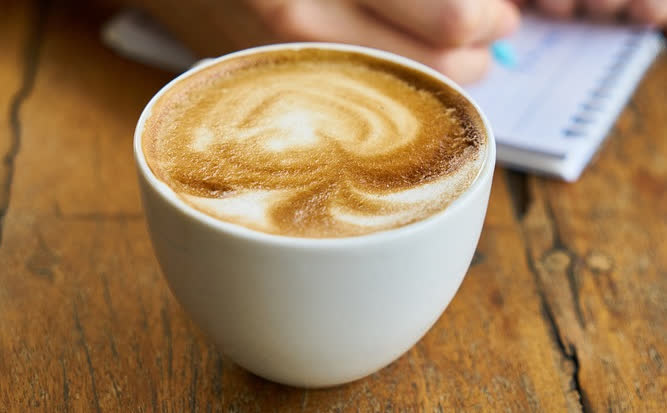

In [39]:
Image(filename='MobileNet-samples/2.JPG', width=300,height=200)

In [40]:
preprocessed_image = prepare_image('2.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

In [41]:
results

[[('n07920052', 'espresso', 0.9766625),
  ('n07930864', 'cup', 0.0100934915),
  ('n07932039', 'eggnog', 0.00859704),
  ('n03063599', 'coffee_mug', 0.0036651783),
  ('n04597913', 'wooden_spoon', 0.0004963663)]]

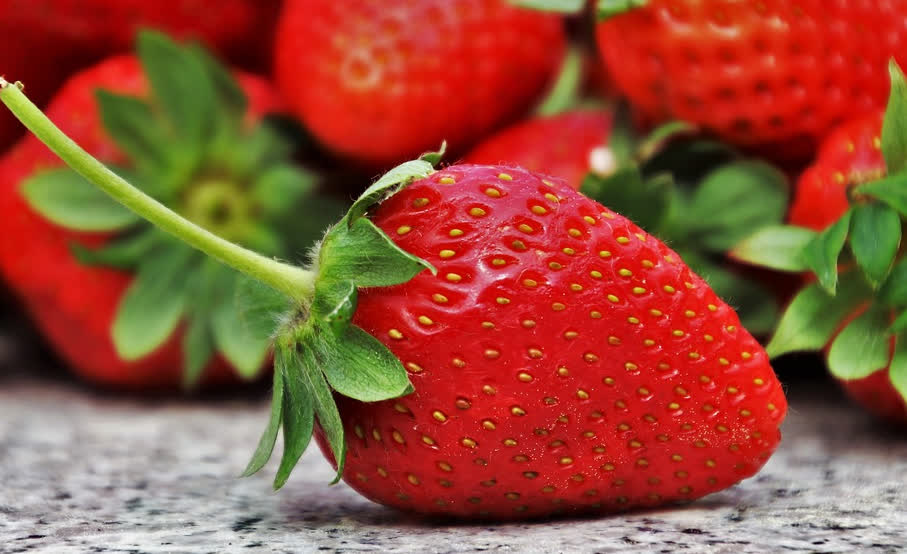

In [42]:
Image(filename='MobileNet-samples/3.JPG', width=300,height=200) 

In [43]:
preprocessed_image = prepare_image('3.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

In [44]:
results

[[('n07745940', 'strawberry', 0.99999356),
  ('n07749582', 'lemon', 1.2431727e-06),
  ('n07747607', 'orange', 8.5951734e-07),
  ('n07753275', 'pineapple', 8.273902e-07),
  ('n07768694', 'pomegranate', 6.261028e-07)]]

### Sign Language Digits Dataset

In [45]:
# Organize data into train, valid, test dirs
os.chdir('Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [47]:
train_path = 'E:/windows_coding/Keras/Sign-Language-Digits-Dataset/train'
valid_path = 'E:/windows_coding/Keras/Sign-Language-Digits-Dataset/valid'
test_path = 'E:/windows_coding/Keras/Sign-Language-Digits-Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


###  Modify Model

In [48]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [49]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [50]:
model = Model(inputs=mobile.input, outputs=output)

In [51]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [52]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [54]:
model.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
172/172 - 63s - loss: 0.6529 - accuracy: 0.8078 - val_loss: 0.3246 - val_accuracy: 0.9067
Epoch 2/30
172/172 - 65s - loss: 0.1200 - accuracy: 0.9807 - val_loss: 0.1110 - val_accuracy: 0.9800
Epoch 3/30
172/172 - 66s - loss: 0.0608 - accuracy: 0.9907 - val_loss: 0.1010 - val_accuracy: 0.9667
Epoch 4/30
172/172 - 67s - loss: 0.0384 - accuracy: 0.9947 - val_loss: 0.0860 - val_accuracy: 0.9800
Epoch 5/30
172/172 - 66s - loss: 0.0265 - accuracy: 0.9977 - val_loss: 0.0571 - val_accuracy: 0.9800
Epoch 6/30
172/172 - 66s - loss: 0.0159 - accuracy: 0.9994 - val_loss: 0.0599 - val_accuracy: 0.9800
Epoch 7/30
172/172 - 75s - loss: 0.0162 - accuracy: 0.9982 - val_loss: 0.0481 - val_accuracy: 0.9867
Epoch 8/30
172/172 - 71s - loss: 0.0175 - accuracy: 0.9982 - val_loss: 0.0609 - val_accuracy: 0.9800
Epoch 9/30
172/172 - 65s - loss: 0.0170 - accuracy: 0.9982 - val_loss: 0.0379 - val_accuracy: 0.9900
Epoch 10/30
172/172 - 65s - loss: 0.0136 - accuracy: 0.9982 - val_loss: 0.0769 - val_accura

### Predict sign language digits

In [56]:
test_labels = test_batches.classes

In [57]:
predictions = model.predict(x = test_batches, verbose = 0)

In [58]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

In [60]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


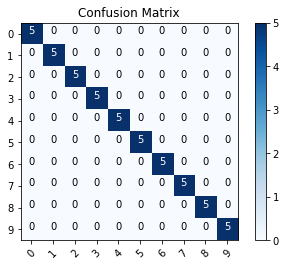

In [61]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Data Augmentation

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [63]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [64]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [66]:
chosen_image = random.choice(os.listdir('E:/windows_coding/Keras/dogs-vs-cats/train/dog'))

In [67]:
image_path = 'E:/windows_coding/Keras/dogs-vs-cats/train/dog/' + chosen_image

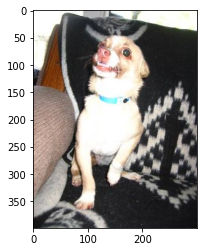

In [68]:
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [69]:
aug_iter = gen.flow(image)

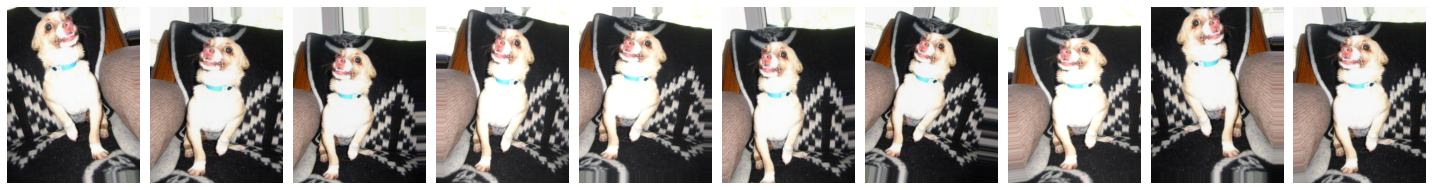

In [70]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plotImages(aug_images)

### To save augmented data

In [ ]:
aug_iter = gen.flow(image, save_to_dir='data/dogs-vs-cats/train/dog', save_prefix='aug-image-', save_format='jpeg')